In [1]:
import pandas as pd

In [2]:
file_path = (r'D:\AI SIC 2025\Final Project\data\raw\Medicaldataset.csv')
df = pd.read_csv(file_path)
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


encoding the result column: positive=1, negative=0

In [3]:
df['Result']= df['Result'].map({'positive':1, 'negative':0})

In [4]:
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


In [5]:
df['Blood sugar']=df['Blood sugar'].apply(lambda x:1 if x>120 else 0)

In [6]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   int64  
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 92.9 KB


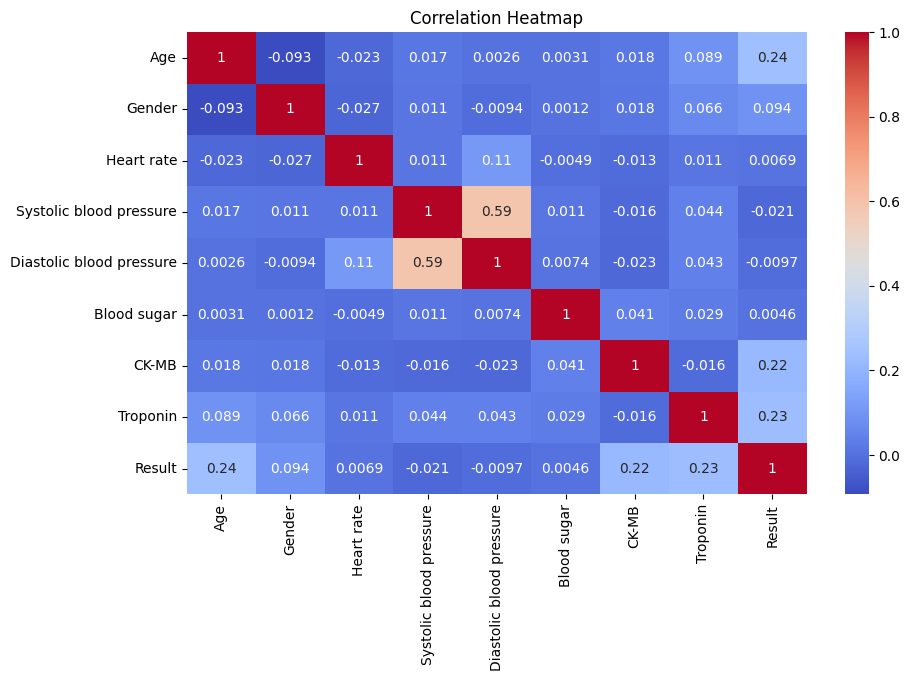

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Accuracy is: 98.11 %

 Classification report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       101
           1       0.98      0.99      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



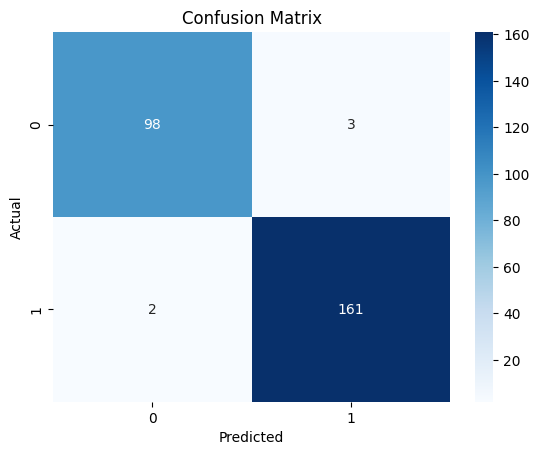

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Separation of feature and target
X = df.drop('Result', axis=1)
y= df['Result']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediction
y_pred= model.predict(X_test)

# Accuracy
accu = accuracy_score(y_test, y_pred)
print("Accuracy is:", round(accu*100, 2),"%")

# Classification report
print("\n Classification report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# 1. Prepare the data
X = df.drop('Result', axis=1)
y = df['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# 3. Train and evaluate models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))
    print(f"\n {name}")
    print(f" Accuracy: {round(acc * 100, 2)}%")
    print(classification_report(y_test, y_pred))



 Logistic Regression
 Accuracy: 79.92%
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       101
           1       0.83      0.85      0.84       163

    accuracy                           0.80       264
   macro avg       0.79      0.78      0.79       264
weighted avg       0.80      0.80      0.80       264


 Random Forest
 Accuracy: 98.11%
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       101
           1       0.98      0.99      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264


 SVM
 Accuracy: 71.59%
              precision    recall  f1-score   support

           0       0.74      0.40      0.52       101
           1       0.71      0.91      0.80       163

    accuracy                           0.72       264
   macro avg       0.73      0

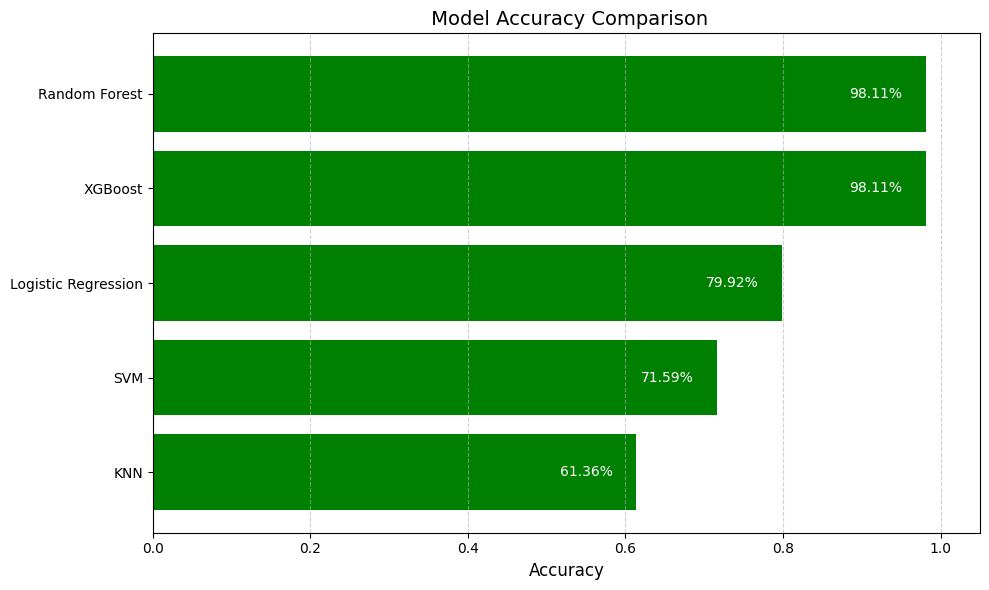

In [10]:
# Sort results by accuracy (descending)
results.sort(key=lambda x: x[1], reverse=True)
names = [r[0] for r in results]
scores = [r[1] for r in results]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(names, scores, color='green')

# Add percentage labels inside the bars if wide enough, else to the right
for bar, score in zip(bars, scores):
    width = bar.get_width()
    label_x_pos = width - 0.03 if width > 0.15 else width + 0.01
    plt.text(label_x_pos, bar.get_y() + bar.get_height() / 2,
             f"{score:.2%}", va='center', ha='left' if width < 0.15 else 'right',
             color='black' if width < 0.15 else 'white', fontsize=10)

# Set axis and title
plt.xlabel("Accuracy", fontsize=12)
plt.title(" Model Accuracy Comparison", fontsize=14)
plt.xlim(0, 1.05)
plt.gca().invert_yaxis()  # Highest accuracy on top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


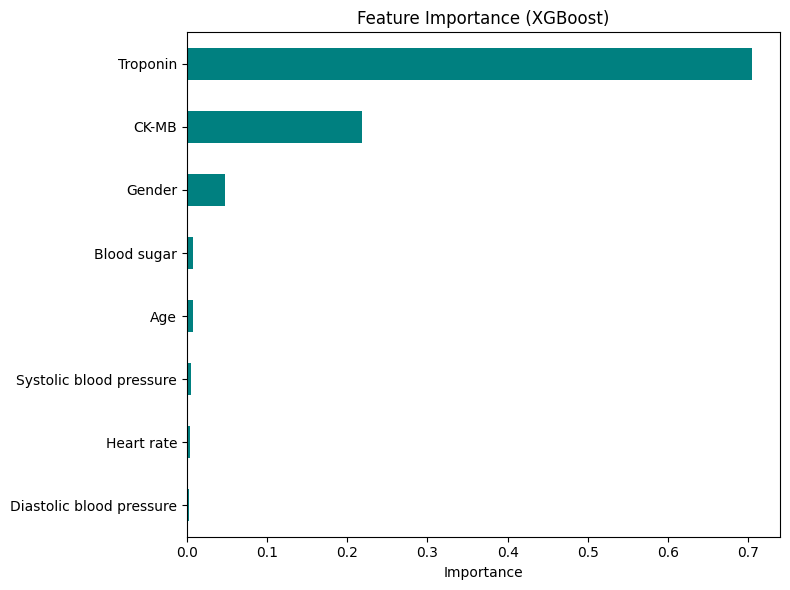

In [11]:
# Using best model (Here XGBoost is being used)
importances = models['XGBoost'].feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(8, 6))
feat_importance.plot(kind='barh', color='teal')
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [12]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(models['XGBoost'], X, y, cv=5)
print("Cross-validated accuracy:", scores.mean())


Cross-validated accuracy: 0.9893881783615622
